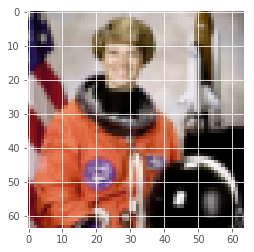

In [1]:
%matplotlib inline
# %pylab osx
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
plt.style.use('ggplot')

from skimage.data import astronaut
from scipy.misc import imresize
img = imresize(astronaut(), (64, 64))
plt.imshow(img)

In [2]:
# We'll first collect all the positions in the image in our list, xs
xs = []

# And the corresponding colors for each of these positions
ys = []

# Now loop over the image
for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        # And store the inputs
        xs.append([row_i, col_i])
        # And outputs that the network needs to learn to predict
        ys.append(img[row_i, col_i])

# we'll convert our lists to arrays
xs = np.array(xs)
ys = np.array(ys)

# Normalizing the input by the mean and standard deviation
xs = (xs - np.mean(xs)) / np.std(xs)

# and print the shapes
xs.shape, ys.shape


((4096, 2), (4096, 3))

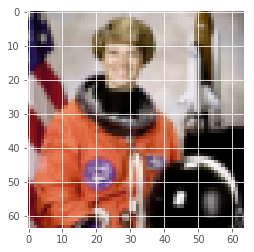

In [3]:
plt.imshow(ys.reshape(img.shape))

In [4]:
X = tf.placeholder(tf.float32, shape=[None, 2], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 3], name='Y')

In [5]:
def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        h = tf.matmul(X, W) + b
        if activation is not None:
            h = activation(h)
        return h
    
def distance(p1, p2):
    return tf.abs(p1 - p2)    

In [ ]:
# first clear the graph
from tensorflow.python.framework import ops
ops.reset_default_graph()

# let's get the current graph
g = tf.get_default_graph()

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

# let's create a new network
#X = tf.placeholder(tf.float32, name='X')
#h = linear(X, 2, 10, scope='layer1')

# See the names of any operations in the graph
#[op.name for op in tf.get_default_graph().get_operations()]

In [ ]:
# connect the output of our last network to another one!

# make network deeper
#h2 = linear(h, 10, 10, scope='layer2')

#h3 = linear(h2, 10, 3, scope='layer3')

# Now when we look at the names of the operations in the graph, we can directly see which operations belong to each layer!
#[op.name for op in tf.get_default_graph().get_operations()]

In [6]:
n_neurons = [2, 64, 64, 64, 64, 64, 64, 3]

current_input = X
for layer_i in range(1, len(n_neurons)):
    current_input = linear(
        X=current_input,
        n_input=n_neurons[layer_i - 1],
        n_output=n_neurons[layer_i],
        activation=tf.nn.relu if (layer_i+1) < len(n_neurons) else None,
        scope='layer_' + str(layer_i))
Y_pred = current_input


In [7]:
cost = tf.reduce_mean(
    tf.reduce_sum(distance(Y_pred, Y), 1))

In [8]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

0 177.115
1 161.27
2 154.703
3 148.835
4 145.088
5 143.055
6 140.707
7 138.274
8 135.556
9 133.457
10 132.648
11 130.287
12 128.268
13 130.327
14 126.869
15 125.792
16 124.11
17 124.71
18 123.104
19 121.051


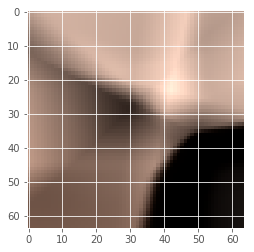

20 111.116
21 112.949
22 109.058
23 107.55
24 111.298
25 108.767
26 107.27
27 105.467
28 104.729
29 104.635
30 105.764
31 105.254
32 103.47
33 102.341
34 101.187
35 103.127
36 103.061
37 99.5014
38 98.5414
39 97.3943


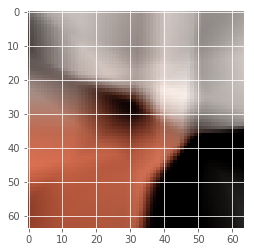

40 100.274
41 97.8916
42 99.6063
43 97.8072
44 95.4191
45 96.0715
46 92.752
47 91.6596
48 92.8538
49 95.3849
50 91.5507
51 88.9901
52 89.9988
53 90.5147
54 89.2272
55 91.9158
56 88.0135
57 87.8745
58 87.8606
59 88.1617


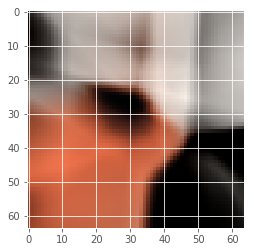

60 85.4144
61 87.6852
62 89.3439
63 92.0221
64 89.1804
65 86.7384
66 82.8015
67 84.3735
68 81.9985
69 81.4508
70 83.2579
71 83.6697
72 80.4461
73 84.293
74 80.1753
75 82.5207
76 83.9562
77 84.5157
78 83.9493
79 80.3204


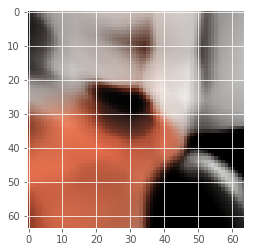

80 78.5535
81 80.5218
82 76.9424
83 80.8278
84 79.0499
85 80.7391
86 75.2092
87 76.0763
88 73.7775
89 78.1861
90 76.2231
91 74.1376
92 74.4197
93 74.241
94 76.8158
95 75.2855
96 77.5375
97 73.1098
98 76.0014
99 74.5835


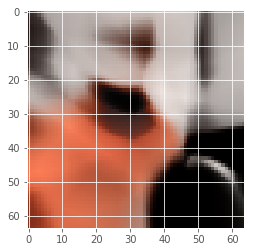

100 75.0407
101 74.2425
102 71.633
103 72.0213
104 73.4139
105 72.2594
106 75.3823
107 69.6908
108 73.3176
109 70.198
110 71.9293
111 72.2133
112 72.5268
113 71.5453
114 74.722
115 76.5818
116 69.9279
117 70.2411
118 67.5257
119 67.353


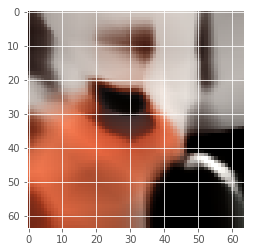

120 70.0608
121 67.7455
122 66.0918
123 65.4153
124 68.1052
125 67.6858
126 64.4421
127 65.7837
128 72.1308
129 74.8475
130 67.5528
131 69.1404
132 67.0836
133 68.0116
134 68.7953
135 66.6771
136 62.0684
137 70.3954
138 65.5363
139 64.8695


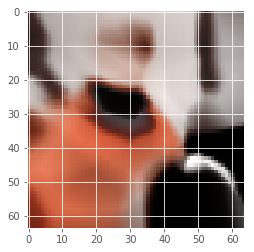

140 69.2886
141 66.6078
142 66.3759
143 67.4859
144 62.5158
145 64.1938
146 64.2548
147 65.4264
148 70.5163
149 63.3947
150 62.4706
151 64.6345
152 63.0793
153 63.2748
154 62.8113
155 60.4598
156 63.3379
157 62.628
158 59.9989
159 68.7254


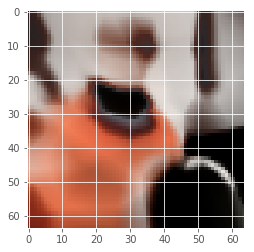

160 62.3474
161 61.4137
162 66.3557
163 63.8007
164 60.5892
165 69.4929
166 60.3371
167 59.2809
168 60.3998
169 63.8982
170 60.9719
171 68.0136
172 61.7304
173 64.7097
174 61.2823
175 58.45
176 60.7995
177 61.7499
178 66.1367
179 63.3916


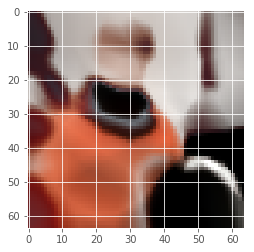

180 63.1987
181 61.0047
182 60.0884
183 63.8994
184 60.8607
185 61.3747
186 59.8617
187 56.6423
188 56.9326
189 60.4575
190 55.9644
191 57.9237
192 59.5523
193 56.8461
194 62.9246
195 56.7487
196 59.8111
197 57.2363
198 60.3562
199 56.8031


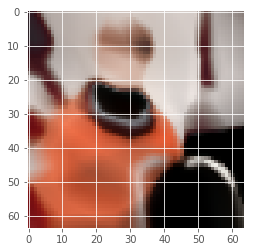

200 53.6353
201 62.3587
202 54.8098
203 59.5683
204 58.3398
205 59.2659
206 55.5302
207 55.051
208 60.0181
209 59.2942
210 56.6893
211 62.0094
212 55.7441
213 56.5811
214 53.3842
215 59.3238
216 54.055
217 56.0298
218 58.0648
219 59.4342


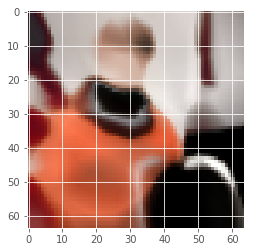

220 54.2365
221 53.6806
222 55.7942
223 61.5853
224 56.6119
225 57.29
226 56.1135
227 57.7938
228 59.2208
229 58.2034
230 53.1071
231 56.3307
232 56.3432
233 59.4951
234 54.0073
235 60.5053
236 58.9648
237 53.5481
238 57.4032
239 61.0623


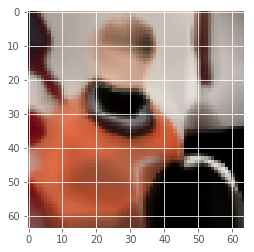

240 52.8616
241 53.6113
242 54.7922
243 58.4297
244 53.9593
245 53.6351
246 51.9306
247 53.28
248 55.3795
249 60.3357
250 52.1774
251 53.6514
252 52.8251
253 52.7891
254 54.1196
255 55.098
256 51.949
257 54.0045
258 54.3749
259 52.8606


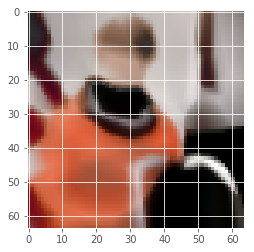

260 52.6157
261 52.4147
262 52.8825
263 52.8762
264 56.3974
265 55.7543
266 51.1289
267 52.5563
268 51.2029
269 55.0518
270 50.3113
271 57.9407
272 56.6029
273 58.504
274 52.5493
275 59.1433
276 51.956
277 54.2327
278 50.1227
279 52.3903


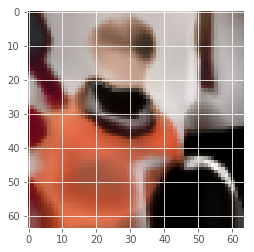

280 52.3879
281 51.2213
282 58.0824
283 49.8966
284 51.5305
285 52.1204
286 50.175
287 51.9851
288 56.7549
289 53.3153
290 52.161
291 53.6249
292 53.3217
293 53.0074
294 52.2372
295 52.3287
296 52.6429
297 57.5724
298 49.5677
299 51.2878


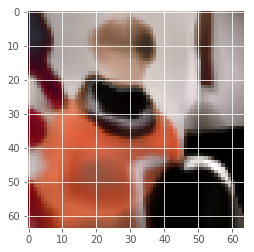

300 53.3718
301 53.9496
302 55.2875
303 51.7406
304 52.8395
305 50.5591
306 53.4128
307 50.834
308 57.1983
309 54.1231
310 49.9225
311 47.2769
312 49.4987
313 48.2589
314 52.5744
315 50.7687
316 54.8533
317 49.6199
318 51.3422
319 49.7791


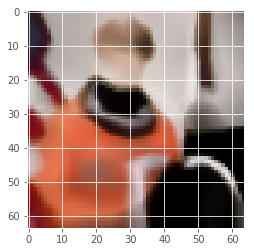

320 51.2893
321 50.9134
322 49.1988
323 48.7976
324 49.577
325 52.1061
326 51.147
327 50.0839
328 54.4099
329 47.7219
330 54.4231
331 52.3943
332 51.8769
333 53.6344
334 48.9525
335 57.0396
336 53.0348
337 52.4005
338 52.3774
339 49.6868


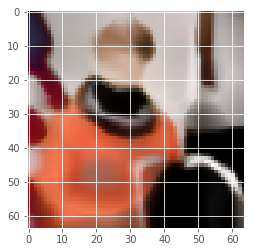

340 52.6174
341 49.6862
342 47.7436
343 48.4055
344 48.2995
345 49.1282
346 48.566
347 49.3404
348 48.8394
349 48.6539
350 47.814
351 46.5507
352 47.8063
353 47.2571
354 46.5766
355 50.2681
356 50.1961
357 47.5429
358 49.1535
359 48.5287


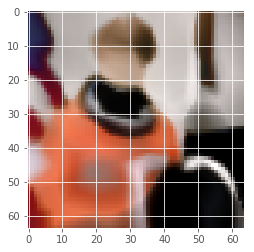

360 45.833
361 47.2889
362 47.4327
363 52.0434
364 48.3438
365 45.9505
366 48.9014
367 45.8727
368 45.7908
369 47.1923
370 46.6407
371 47.4035
372 52.2614
373 47.8581
374 48.9638
375 50.8446
376 49.4174
377 47.4888
378 46.8036
379 46.6476


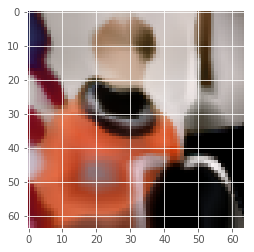

380 46.5783
381 45.8168
382 48.8256
383 49.9714
384 44.6883
385 50.3394
386 48.4422
387 45.0671
388 45.5308
389 47.3493
390 47.7077
391 47.4831
392 50.1695
393 47.6817
394 49.1028
395 52.3884
396 43.6766
397 42.7928
398 46.5671
399 46.6462


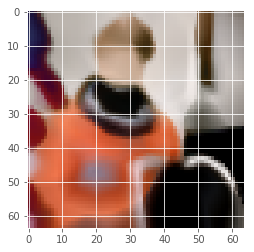

400 45.9671
401 48.7697
402 45.9073
403 49.4289
404 44.6273
405 47.4358
406 47.2215
407 43.5172
408 50.4641
409 46.949
410 44.6386
411 52.3809
412 47.8621
413 46.5975
414 44.5619
415 43.201
416 46.8776
417 47.5269
418 45.5282
419 42.8481


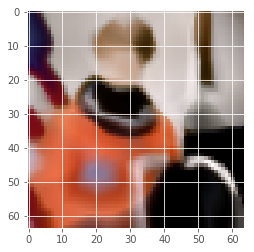

420 43.9375
421 48.8901
422 46.9816
423 47.2583
424 43.4875
425 44.3988
426 44.4938
427 43.2388
428 43.1642
429 47.2763
430 43.6765
431 43.8187
432 43.6392
433 44.8837
434 46.5007
435 46.7794
436 43.0355
437 44.4045
438 46.8133
439 43.3143


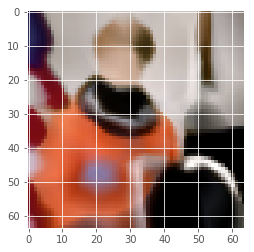

440 44.0838
441 42.9931
442 44.2848
443 44.3507
444 45.6781
445 42.1431
446 45.0571
447 42.1538
448 47.0323
449 45.5999
450 43.9105
451 43.4683
452 42.8433
453 49.4985
454 45.2393
455 44.1793
456 46.8068
457 43.6637
458 44.6971
459 43.6539


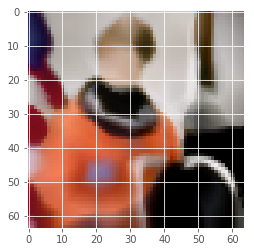

460 47.4714
461 40.6385
462 42.5307
463 45.8399
464 42.0076
465 45.4608
466 44.5594
467 42.7645
468 48.6064
469 45.3222
470 42.0893
471 42.2899
472 45.0634
473 43.8789
474 44.4276
475 50.579
476 44.9831
477 41.4654
478 42.0335
479 42.9775


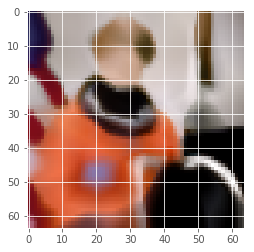

480 44.3584
481 41.569
482 44.0363
483 51.2177
484 45.9952
485 42.2721
486 43.887
487 44.8509
488 42.3228
489 42.4627
490 42.4453
491 42.2167
492 42.7145
493 41.6257
494 40.8765
495 44.2898
496 40.5755
497 41.368
498 42.4663
499 41.3406


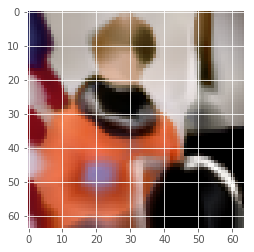

In [9]:
n_iterations = 500
batch_size = 50
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set W and b to their initial random normal value.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
        print(it_i, training_cost)

        if (it_i + 1) % 20 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            fig, ax = plt.subplots(1, 1)
            img = np.clip(ys_pred.reshape(img.shape), 0, 255).astype(np.uint8)
            plt.imshow(img)
            plt.show()